In [16]:
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [56]:
df_cd = pd.read_csv('city_day.csv')
df_cd1=df_cd
df_cd.tail()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [52]:
def build_calmap(df,city=''):
    if city:
        df = df[df['City']==city]
    else:
        city = 'India'

    
    df.drop(df[pd.isnull(df['AQI'])].index,axis=0,inplace=True)
    df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

    df = df[df.Date.dt.year!= 2020]
    df['Year'] = df.Date.dt.year
    df['Day'] = df.Date.dt.day_name()
    df['Week'] = df.Date.dt.week
    years = df.Year.unique().tolist()
    return df



In [53]:
df_ban = build_calmap(df_cd,city='Bengaluru')
df_ban

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Day,Week
4373,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,91.0,Satisfactory,2015,Saturday,12
4374,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,120.0,Moderate,2015,Sunday,12
4375,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,154.0,Moderate,2015,Monday,13
4376,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,119.0,Moderate,2015,Tuesday,13
4377,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,232.0,Poor,2015,Wednesday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Bengaluru,2019-12-27,43.32,87.09,9.56,31.24,32.59,14.71,1.09,6.60,39.42,1.66,41.25,NaN,98.0,Satisfactory,2019,Friday,52
6116,Bengaluru,2019-12-28,35.24,70.75,7.86,26.94,27.78,13.37,0.97,7.38,37.81,0.93,44.93,NaN,82.0,Satisfactory,2019,Saturday,52
6117,Bengaluru,2019-12-29,38.53,73.77,6.56,26.20,26.31,13.02,0.92,7.39,43.50,0.63,23.56,NaN,80.0,Satisfactory,2019,Sunday,52
6118,Bengaluru,2019-12-30,47.81,77.49,6.40,28.46,27.79,12.91,1.03,8.04,44.92,0.62,24.96,NaN,93.0,Satisfactory,2019,Monday,1


In [54]:
df=df_ban
df = df_ban.groupby(df_ban.Date.dt.year)['AQI'].mean()
df

Date
2015    112.573427
2016    105.584046
2017     87.120879
2018     86.307479
2019     91.602740
Name: AQI, dtype: float64

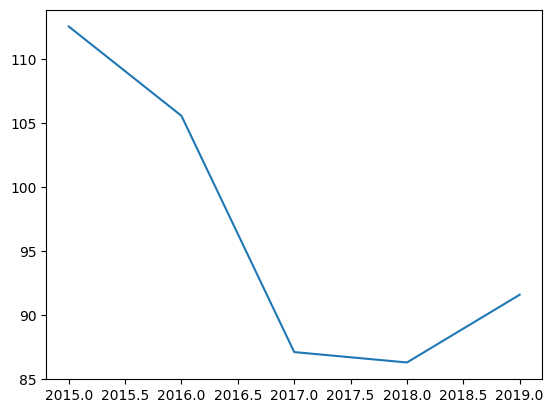

In [55]:
plt.plot(df)
plt.show()

In [48]:
def total(df):
    df.drop(df[pd.isnull(df['AQI'])].index,axis=0,inplace=True)
    df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
    df = df[df.Date.dt.year!= 2020]
    df['Year'] = df.Date.dt.year
    df['Day'] = df.Date.dt.day_name()
    df['Week'] = df.Date.dt.week
    years = df.Year.unique().tolist()
    return df


In [57]:
df_ban1 = total(df_cd1)
df_ban1



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Day,Week
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor,2015,Thursday,5
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor,2015,Friday,5
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe,2015,Saturday,5
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,2015,Sunday,5
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe,2015,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29342,Visakhapatnam,2019-12-26,62.22,NaN,22.95,52.05,46.34,9.98,1.16,9.19,52.37,6.58,12.59,4.49,120.0,Moderate,2019,Thursday,52
29343,Visakhapatnam,2019-12-27,51.79,NaN,34.78,48.39,54.01,9.56,1.24,9.01,34.62,6.72,12.41,4.24,101.0,Moderate,2019,Friday,52
29344,Visakhapatnam,2019-12-28,74.53,NaN,4.21,33.50,21.25,9.72,1.21,6.30,42.20,5.58,9.34,2.23,110.0,Moderate,2019,Saturday,52
29345,Visakhapatnam,2019-12-29,41.00,NaN,2.37,20.94,13.07,6.78,0.74,6.25,70.48,3.76,12.04,0.71,133.0,Moderate,2019,Sunday,52


In [58]:
df1=df_ban1
df1 = df_ban1.groupby(df_ban.Date.dt.year)['AQI'].mean()
df1

Date
2015.0    112.573427
2016.0    105.584046
2017.0     87.120879
2018.0     86.307479
2019.0     91.602740
Name: AQI, dtype: float64

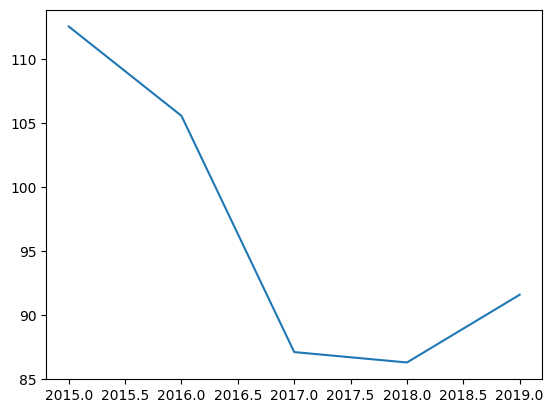

In [59]:
plt.plot(df1)
plt.show()

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import re
import tensorflow as tf


[2015, 2016, 2017, 2018, 2019, 2020]
[112.22299922299922, 115.64302610114193, 87.62905908442896, 86.76083971672207, 92.73561864084343, 81.7290293476354]


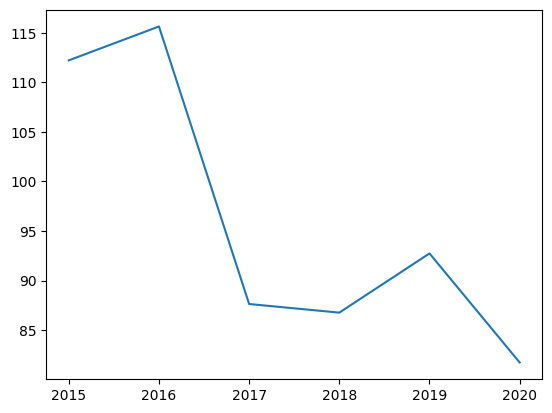

In [62]:
df = pd.read_csv('city_day.csv')
station_hr_blr = pd.read_csv('station_hour_blr.csv')
stations = pd.read_csv('stations.csv')
blore_index = df[df['City'] != 'Bengaluru'].index # index values that are not City Bengaluru
blore_df = df.drop(blore_index) # New Data frame blore_df formed by dropping index values obtained from above

blore_df=blore_df.dropna(subset=['AQI'])


station_name = stations[stations['City'] == 'Bengaluru']

station_hr_blr['Datetime'] = pd.to_datetime(station_hr_blr['Datetime'],format='%Y-%m-%d %H:%M:%S')
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0
        
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN


station_hr_blr["PM10_24hr_avg"]=station_hr_blr.groupby("StationId")["PM10"].rolling(window = 24,min_periods = 1).mean().values
station_hr_blr["PM2.5_24hr_avg"]=station_hr_blr.groupby("StationId")["PM2.5"].rolling(window = 24,min_periods = 1).mean().values
station_hr_blr["SO2_24hr_avg"]=station_hr_blr.groupby("StationId")["SO2"].rolling(window = 24,min_periods = 1).mean().values
station_hr_blr["NOx_24hr_avg"]=station_hr_blr.groupby("StationId")["NOx"].rolling(window = 24,min_periods = 1).mean().values
station_hr_blr["NH3_24hr_avg"]=station_hr_blr.groupby("StationId")["NH3"].rolling(window = 24,min_periods = 1).mean().values
station_hr_blr["CO_8hr_max"]=station_hr_blr.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
station_hr_blr["O3_8hr_max"]=station_hr_blr.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values



station_hr_blr["PM2.5_SubIndex"] = station_hr_blr["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

station_hr_blr["PM10_SubIndex"] = station_hr_blr["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

station_hr_blr["SO2_SubIndex"] = station_hr_blr["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

station_hr_blr["NOx_SubIndex"] = station_hr_blr["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

station_hr_blr["NH3_SubIndex"] = station_hr_blr["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

station_hr_blr["CO_SubIndex"] = station_hr_blr["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

station_hr_blr["O3_SubIndex"] = station_hr_blr["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

station_hr_blr["Checks"] = (station_hr_blr["PM2.5_SubIndex"] > 0).astype(int) + \
                (station_hr_blr["PM10_SubIndex"] > 0).astype(int) + \
                (station_hr_blr["SO2_SubIndex"] > 0).astype(int) + \
                (station_hr_blr["NOx_SubIndex"] > 0).astype(int) + \
                (station_hr_blr["NH3_SubIndex"] > 0).astype(int) + \
                (station_hr_blr["CO_SubIndex"] > 0).astype(int) + \
                (station_hr_blr["O3_SubIndex"] > 0).astype(int)

station_hr_blr["AQI_calculated"] = round(station_hr_blr[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))

station_hr_blr.loc[station_hr_blr["PM2.5_SubIndex"] + station_hr_blr["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
station_hr_blr.loc[station_hr_blr.Checks < 3, "AQI_calculated"] = np.NaN


station_hr_blr["AQI_bucket_calculated"] = station_hr_blr["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

station_hr_blr.to_csv('station_hour_blr.csv')








#station_hr_blr['Datetime'] = pd.to_datetime(station_hr_blr['Datetime'],format='%m/%d/%Y' or '%m-%d-%Y')

date_aqi = station_hr_blr.filter(['Datetime','AQI_calculated'], axis=1)
date_aqi['Datetime'] = pd.to_datetime(date_aqi['Datetime'],format='%Y-%m-%d %H:%M:%S')
date_aqi['Avg_AQI'] = date_aqi.groupby(date_aqi.Datetime.dt.year)['AQI_calculated'].transform('mean')



#years = date_aqi.Datetime.dt.year.unique().tolist()
years = [2015,2016,2017,2018,2019,2020]
avg_aqi = [112.22299922299922, 115.64302610114193, 87.62905908442896,86.76083971672207, 92.73561864084343, 81.7290293476354]
#avg_aqi = date_aqi.Avg_AQI.unique().tolist()

print(years)
print(avg_aqi)

plt.plot(years,avg_aqi)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

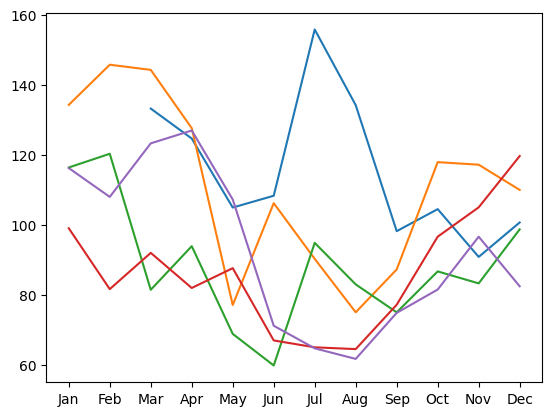

In [63]:
from cmath import nan


aqi_2015 = station_hr_blr[station_hr_blr.Datetime.dt.year == 2015]
aqi_2015['AQI_month'] = aqi_2015.groupby(aqi_2015.Datetime.dt.month)['AQI_calculated'].transform('mean')
months = ['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
m = aqi_2015.Datetime.dt.month.unique().tolist()
aqi_2015_month = aqi_2015.AQI_month.unique().tolist()
aqi_2015_month.insert(1,nan)

aqi_2016 = station_hr_blr[station_hr_blr.Datetime.dt.year == 2016]
aqi_2016['AQI_month'] = aqi_2016.groupby(aqi_2016.Datetime.dt.month)['AQI_calculated'].transform('mean')
aqi_2016_month = aqi_2016.AQI_month.unique().tolist()

aqi_2017 = station_hr_blr[station_hr_blr.Datetime.dt.year == 2017]
aqi_2017['AQI_month'] = aqi_2017.groupby(aqi_2017.Datetime.dt.month)['AQI_calculated'].transform('mean')
aqi_2017_month = aqi_2017.AQI_month.unique().tolist()

aqi_2019 = station_hr_blr[station_hr_blr.Datetime.dt.year == 2019]
aqi_2019['AQI_month'] = aqi_2019.groupby(aqi_2019.Datetime.dt.month)['AQI_calculated'].transform('mean')
aqi_2019_month = aqi_2019.AQI_month.unique().tolist()

aqi_2018 = station_hr_blr[station_hr_blr.Datetime.dt.year == 2018]
aqi_2018['AQI_month'] = aqi_2018.groupby(aqi_2018.Datetime.dt.month)['AQI_calculated'].transform('mean')
aqi_2018_month = aqi_2018.AQI_month.unique().tolist()

plt.plot(months,aqi_2015_month)
plt.plot(months,aqi_2016_month)
plt.plot(months,aqi_2017_month)
plt.plot(months,aqi_2018_month)
plt.plot(months,aqi_2019_month)

plt.show

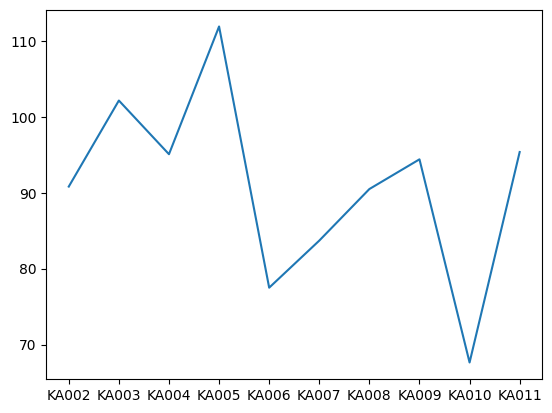

In [64]:
area = station_hr_blr.groupby(station_hr_blr.StationId)['AQI_calculated'].transform('mean')
area_wise_aqi = area.unique().tolist()

stations = station_hr_blr.filter(['StationId'],axis=1)
stations = stations['StationId'].unique().tolist()


plt.plot(stations,area_wise_aqi)
plt.show()

In [65]:
station1=station_hr_blr[station_hr_blr.Datetime.dt.year!=2015]
station1


,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,StationId,Datetime,PM2.5,PM10,NO,NO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,0,0,0,1372542,KA002,2018-01-09 12:00:00,50.60,NaN,1.96,11.09,...,84.333333,0.000000,4.850000,7.650000,0.000000,43.50,87.82,5,88.0,Satisfactory
1,1,1,1,1372543,KA002,2018-01-09 13:00:00,35.34,NaN,1.70,7.95,...,71.616667,0.000000,8.687500,6.581250,0.000000,70.00,87.82,5,88.0,Satisfactory
2,2,2,2,1372544,KA002,2018-01-09 14:00:00,33.15,NaN,2.19,16.03,...,66.161111,0.000000,8.045833,8.016667,0.000000,75.50,87.82,5,88.0,Satisfactory
3,3,3,3,1372545,KA002,2018-01-09 15:00:00,37.04,NaN,1.82,15.93,...,65.054167,0.000000,6.728125,8.631250,0.000000,75.50,87.82,5,88.0,Satisfactory
4,4,4,4,1372546,KA002,2018-01-09 16:00:00,35.59,NaN,1.90,15.01,...,63.906667,0.000000,8.205000,8.905000,0.000000,75.50,87.82,5,88.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287559,287559,287559,287559,1660101,KA011,2020-06-30 20:00:00,14.75,82.50,NaN,19.30,...,18.916667,85.250000,0.000000,19.861111,2.429167,45.50,43.48,6,85.0,Satisfactory
287560,287560,287560,287560,1660102,KA011,2020-06-30 21:00:00,11.50,68.50,NaN,15.38,...,18.958333,82.857143,0.000000,19.926389,2.472778,45.50,43.48,6,83.0,Satisfactory
287561,287561,287561,287561,1660103,KA011,2020-06-30 22:00:00,12.75,55.25,NaN,15.50,...,19.285714,80.321429,0.000000,20.152778,2.521111,108.25,43.48,6,108.0,Moderate
287562,287562,287562,287562,1660104,KA011,2020-06-30 23:00:00,12.50,49.25,NaN,15.43,...,21.071429,77.892857,0.000000,20.288889,2.582778,108.25,43.48,6,108.0,Moderate


In [109]:
from datetime import datetime
X=station1[['StationId','Datetime']].copy()

for i in X['Datetime']:
    i = i.timestamp()
    tf.convert_to_tensor(i)
X
    


,StationId,Datetime
0,KA002,2018-01-09 12:00:00
1,KA002,2018-01-09 13:00:00
2,KA002,2018-01-09 14:00:00
3,KA002,2018-01-09 15:00:00
4,KA002,2018-01-09 16:00:00
...,...,...
287559,KA011,2020-06-30 20:00:00
287560,KA011,2020-06-30 21:00:00
287561,KA011,2020-06-30 22:00:00
287562,KA011,2020-06-30 23:00:00


In [71]:
Y=station1[['AQI_calculated']].copy()
Y

,AQI_calculated
0,88.0
1,88.0
2,88.0
3,88.0
4,88.0
...,...
287559,85.0
287560,83.0
287561,108.0
287562,108.0


In [110]:
model=keras.Sequential()
""" model.add(keras.layers.Input(shape=(19,))) """
model.add(keras.layers.Dense(2,activation='relu',input_shape=(2,)))
model.add(keras.layers.Dense(2,activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [111]:
model.fit(X,Y,epochs=30)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).